<a href="https://colab.research.google.com/github/omarabedelkader/Lattice/blob/main/Zone_A_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# -*- coding: utf-8 -*-
"""
@author: Omar Abedelkader

# Private Repository

# **PRIVATE AND CONFIDENTIAL LICENSE**

**Warning:** This repository is strictly private and confidential. Unauthorized access, use, or distribution of the code, its contents, or any results derived from it is illegal and will be subject to legal action.

1. **Private and Confidential**: This software is provided under the strictest confidence. Any access, use, modification, reproduction, or distribution of this software, its source code, or any related materials for any purpose is strictly prohibited and illegal.

2. **Unauthorized Use**: Unauthorized use or access to this software constitutes a breach of confidentiality and may result in legal action.

3. **No Warranty**: This software is provided "as is," without any warranty or guarantee of any kind. The owner of this software makes no representations or warranties regarding its functionality, accuracy, or fitness for a particular purpose.

4. **Liability**: In no event shall the owner of this software be liable for any damages or legal consequences arising out of the use, modification, or distribution of this software, even if advised of the possibility of such damages.

5. **Enforcement**: The owner of this software reserves the right to take legal action against any party found in violation of this license.

By accessing, using, or copying this software, you agree to be bound by the terms of this license. If you do not agree to the terms of this license, you must not access, use, or copy the software.

"""

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = "/content/drive/MyDrive/Data Mining Project/data/unclean data/FD_INDREGZA_2016.csv"

# Read the CSV file into a Pandas DataFrame
datazoneA = pd.read_csv(csv_file_path, delimiter=";")

datazoneA

<ipython-input-5-3a28d7fd04ad>:7: DtypeWarning: Columns (1,2,3,4,11,12,13,15,18,21,24,39,40,48,49,54,55,56,70,71,77,80,83,84,89,91,92,93,95) have mixed types. Specify dtype option on import or set low_memory=False.
  datazoneA = pd.read_csv(csv_file_path, delimiter=";")


,REGION,NUMMR,ACHLR,AEMM,AEMMR,AGED,AGER20,AGEREV,AGEREVQ,ANAI,...,TP,TRANS,TYPC,TYPFC,TYPL,TYPMD,TYPMR,UR,VOIT,WC
0,11,1,6,2016,9,30,29,29,25,1988,...,Z,Z,3,Z,2,30,20,1,0,Z
1,11,1,6,2016,9,21,24,20,20,1997,...,Z,Z,3,Z,2,30,20,1,0,Z
2,11,2,3,2013,9,41,54,40,40,1973,...,1,4,1,2,1,402,42,1,2,Z
3,11,2,3,2013,9,30,29,29,25,1984,...,Z,Z,1,2,1,402,42,1,2,Z
4,11,2,3,2013,9,9,10,8,5,2005,...,Z,Z,1,2,1,402,42,1,2,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4315652,11,Z,Z,ZZZZ,Z,24,24,23,20,1994,...,1,4,Z,Z,Z,ZZZ,ZZ,1,Z,X
4315653,11,Z,Z,ZZZZ,Z,12,14,12,10,2004,...,Z,Z,Z,Z,Z,ZZZ,ZZ,1,Z,X
4315654,11,Z,Z,ZZZZ,Z,16,17,16,15,2000,...,Z,Z,Z,Z,Z,ZZZ,ZZ,1,Z,X
4315655,11,Z,Z,ZZZZ,Z,35,39,34,30,1981,...,Z,Z,Z,Z,Z,ZZZ,ZZ,1,Z,X


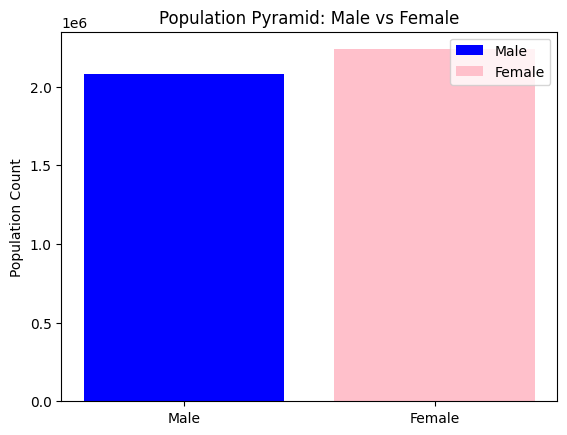

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming the 'SEXE' column contains numeric values (e.g., 1 for Male, 2 for Female)
# You should check your actual dataset to see the numeric codes used for 'SEXE'
sex_counts = datazoneA['SEXE'].value_counts()

# Create a population pyramid
fig, ax = plt.subplots()

# Plotting the male and female data
ax.bar('Male', sex_counts[1], color='blue', label='Male')
ax.bar('Female', sex_counts[2], color='pink', label='Female')

# Customize the appearance
ax.set_ylabel('Population Count')
ax.set_title('Population Pyramid: Male vs Female')
ax.legend()

# Show the plot
plt.show()


In [7]:
datazoneA['AGED']

0          30
1          21
2          41
3          30
4           9
           ..
4315652    24
4315653    12
4315654    16
4315655    35
4315656    39
Name: AGED, Length: 4315657, dtype: int64

In [8]:
import pandas as pd
import plotly.graph_objects as go

age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Convert Interval objects to string representation
datazoneA['Age Group'] = pd.cut(datazoneA['AGED'], bins=age_bins, right=False).astype(str)

# Group data by age group and gender
grouped_data = datazoneA.groupby(['Age Group', 'SEXE']).size().unstack(fill_value=0)

# Extract data for plotting
y_age = list(grouped_data.index)
x_M = list(grouped_data[1])  # Male data
x_F = [-count for count in grouped_data[2]]  # Female data with negative values for pyramid effect

# Creating instance of the figure
fig = go.Figure()

# Adding Male data to the figure
fig.add_trace(go.Bar(y=y_age, x=x_M, name='Male', orientation='h'))

# Adding Female data to the figure
fig.add_trace(go.Bar(y=y_age, x=x_F, name='Female', orientation='h'))

# Updating the layout for our graph
fig.update_layout(
    title='Population Pyramid of Zone A France',
    title_font_size=22,
    barmode='relative',
    bargap=0.0,
    bargroupgap=0,
    xaxis=dict(
        tickvals=[-60000000, -40000000, -20000000, 0, 20000000, 40000000, 60000000],
        ticktext=['6M', '4M', '2M', '0', '2M', '4M', '6M'],
        title='Population in Millions',
        title_font_size=14
    )
)

fig.show()


In [9]:
import pandas as pd

# Display numerical variables
numerical_variables = datazoneA.select_dtypes(include=['int64', 'float64'])
print("Numerical Variables:")
print(numerical_variables.dtypes)

# Display categorical variables
categorical_variables = datazoneA.select_dtypes(include=['object'])
print("\nCategorical Variables:")
print(categorical_variables.dtypes)


Numerical Variables:
REGION       int64
AGED         int64
AGER20       int64
AGEREV       int64
AGEREVQ      int64
ANAI         int64
CATPC        int64
COUPLE       int64
CS1          int64
CS2          int64
CS3          int64
DEPT         int64
EPCI         int64
ETUD         int64
IMMI         int64
INAI         int64
INAT         int64
IPONDI     float64
MOCO         int64
MODV         int64
NAIDT        int64
NAT13        int64
NATC         int64
ORIDT        int64
PNAI12       int64
SEXE         int64
TACT         int64
TACTD16      int64
UR           int64
dtype: object

Categorical Variables:
NUMMR        object
ACHLR        object
AEMM         object
AEMMR        object
ANARR        object
              ...  
TYPMD        object
TYPMR        object
VOIT         object
WC           object
Age Group    object
Length: 69, dtype: object


In [11]:
import pandas as pd

# Assuming 'datazoneA' is your DataFrame
# If you don't have a DataFrame, replace 'datazoneA' with the appropriate DataFrame name

# List of variables
var = ["NUMF", "STAT_CON", "APAF", "MOCO", "MODV", "TYPFC", "TYPMD", "TYPMR", "SFM", "LIENF", "LPRF", "LPRM", "MODV", "INFAM", "SFM", "COUPLE", "NPERR", "INAT", "NAT49", "NATN12", "NAT13", "NATC", "IMMI", "INAI", "NATN49", "DIPL_15", "STAT"]

# Create a DataFrame with your variables
data = pd.DataFrame({col: [] for col in var})

# Display numerical variables
numerical_variables = data.select_dtypes(include=['int64', 'float64'])
print("Numerical Variables:")
print(numerical_variables.dtypes)

# Display categorical variables
categorical_variables = data.select_dtypes(include=['object'])
print("\nCategorical Variables:")
print(categorical_variables.dtypes)


Numerical Variables:
NUMF        float64
STAT_CON    float64
APAF        float64
MOCO        float64
MODV        float64
TYPFC       float64
TYPMD       float64
TYPMR       float64
SFM         float64
LIENF       float64
LPRF        float64
LPRM        float64
INFAM       float64
COUPLE      float64
NPERR       float64
INAT        float64
NAT49       float64
NATN12      float64
NAT13       float64
NATC        float64
IMMI        float64
INAI        float64
NATN49      float64
DIPL_15     float64
STAT        float64
dtype: object

Categorical Variables:
Series([], dtype: object)


In [16]:
import pandas as pd

# Specify the path to your CSV file
csv_file_path = "/content/drive/MyDrive/Data Mining Project/data/unclean data/GrandEst.csv"

# Read the CSV file into a Pandas DataFrame
dataoriginal = pd.read_csv(csv_file_path, delimiter=";")

dataoriginal

<ipython-input-16-a96881ab99c5>:7: DtypeWarning:

Columns (1,2,3,4,11,12,13,15,18,21,24,39,40,48,49,54,55,56,70,71,77,80,83,84,89,91,92,93,95) have mixed types. Specify dtype option on import or set low_memory=False.



,REGION,NUMMR,ACHLR,AEMM,AEMMR,AGED,AGER20,AGEREV,AGEREVQ,ANAI,...,TP,TRANS,TYPC,TYPFC,TYPL,TYPMD,TYPMR,UR,VOIT,WC
0,44,1,3,2008,9,58,64,57,55,1959,...,Z,Z,3,2,2,500,44,1,1,Z
1,44,1,3,2008,9,69,79,68,65,1948,...,Z,Z,3,2,2,500,44,1,1,Z
2,44,2,4,1977,6,70,79,69,65,1948,...,Z,Z,1,Z,1,22,12,0,1,Z
3,44,3,3,2012,9,30,29,29,25,1985,...,1,4,3,2,2,300,41,0,1,Z
4,44,3,3,2012,9,30,29,29,25,1985,...,1,4,3,2,2,300,41,0,1,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474554,44,Z,Z,ZZZZ,Z,23,24,22,20,1993,...,Z,Z,Z,Z,Z,ZZZ,ZZ,0,Z,X
1474555,44,Z,Z,ZZZZ,Z,64,64,63,60,1952,...,Z,Z,Z,Z,Z,ZZZ,ZZ,0,Z,X
1474556,44,Z,Z,ZZZZ,Z,29,29,28,25,1987,...,Z,Z,Z,Z,Z,ZZZ,ZZ,0,Z,X
1474557,44,Z,Z,ZZZZ,Z,48,54,47,45,1968,...,Z,Z,Z,Z,Z,ZZZ,ZZ,0,Z,X
